# Beispielfälle für Vasilis

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from l15_msevi import msevi as msv
%matplotlib inline

from analysis_tools import make_hrv_upscaling as mhu
import datetime as dt

import msg_coord_conv2 as mcc

ModuleNotFoundError: No module named 'pyproj'

In [18]:
from importlib import reload

In [19]:
reload(mcc)

NameError: name 'mcc' is not defined

In [3]:
def normalise2range(data,dmin = None, dmax = None, new_min = 0, new_max = 1,gamma=1):
  
    data = data**(1/gamma)
   
    if dmin == None and dmax == None:
        data_std = ((data - np.min(data)) / (np.max(data) - np.min(data)))
    else:
        data_std = ((data - dmin) / (dmax - dmin))
        data_std = ((data - np.min(data)) / (np.max(data) - np.min(data)))

    data_scaled = data_std * (new_max - new_min) + new_min
    
    return data_scaled

def array_to_255(d, gamma = 1.0):

    dat = d.copy()
    # remove outliners for dat>1. or dat<0.
    dat[dat>1.] = 1.
    dat[dat<0.] = 0.

    if not gamma == 1.0:
        dat = dat ** (1./gamma) 
   
    # transform (0,1)-data to (0,255)-image-scale 
    rgb = 255 * dat
   
    return rgb.astype('uint8')

def scale_array_min_max(array_data,range_min=0,range_max=1):
    """
    Scales a array into the chosen range.
    
    Inputs:
    -------
    array_data: numpy array of floats or integers, 2d
        array to scale
    range_min: int or float, default = 0
        minimum value of the range to scale array to,
    range_max: int or float, default = 1
        maximum value of the range to scale array to,
        
    Returns:
    --------
    scaled_array: numpy array of floats, 2d
    """
    # get array extrema
    array_min = np.min(array_data)
    array_max = np.max(array_data)

    # derive conversion parameters
    a = (range_max - range_min) / (array_max - array_min)
    b = range_max - a * array_max

    # scale array
    scaled_array = a * array_data + b
    
    return scaled_array

def add_hrv_texture2nc(nc,hrv):
    nc_lab = color.rgb2lab(nc)
    l_min = nc_lab[...,0].min()
    l_max = nc_lab[...,0].max()
    
    l_hrv_scaled = nc_lab[...,0] * hrv
    l_hrv_scaled = scale_array_min_max(l_hrv_scaled,l_min,l_max)

    nc_lab[...,0] = l_hrv_scaled
    
    return color.lab2rgb(nc_lab)
    
def gamma2(values,gamma):
    vmin = np.min(values)
    vmax = np.max(values)
    
    vmean = (vmin + vmax)/2
    
    below_mean = np.where(values < vmean)
    above_mean = np.where(values >= vmean)
    out = np.zeros(values.shape)
    out[below_mean] = 128 - 128 * ((vmean - values[below_mean]) / (vmean - vmin))**(1/gamma)
    out[above_mean] = 128 + 128 * ((values[above_mean] - vmean) / (vmax - vmean))**(1/gamma)
    
    return out
    
def sat_rgb(red_channel,green_channel,blue_channel):
    red = array_to_255(red_channel,1.0)
    green = array_to_255(green_channel,1.0)
    blue = array_to_255(blue_channel,1.0)
    
    return np.dstack([red,green,blue]).astype("uint8")

def day_natural_composite(vis006_data,vis008_data,nir016_data):
    (rmin, rmax, rgamma) = (0,1,1)
    (gmin, gmax, ggamma) = (0,1,1)
    (bmin, bmax, bgamma) = (0,1,1)
    
    comp = sat_rgb(np.clip(nir016_data,rmin,rmax),
                   np.clip(vis008_data,gmin,gmax),
                   np.clip(vis006_data,bmin,bmax))

    return comp   

In [5]:
t_case0 = dt.datetime(2015,5,11,12,0)

In [10]:
channels = ['VIS006','VIS008','IR_016']

In [11]:
s = msv.MSevi(t_case0,chan_list=channels,region='full',scan_type='rss')

... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-VIS006___-000006___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-VIS006___-000007___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-VIS006___-000008___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-VIS008___-000006___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-VIS008___-000007___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-VIS008___-000008___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-IR_016___-000006___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-IR_016___-000007___-201505111200-__
... reading  /tmp/hrit4919635832/H-000-MSG2__-MSG2_RSS____-IR_016___-000008___-201505111200-__

Combine segments

Do calibration


In [12]:
s.rad2refl()

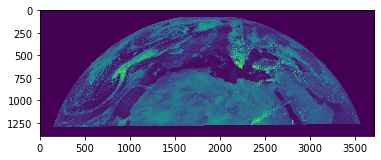

In [13]:
plt.imshow(s.ref['VIS006'])